Kredyt case study

Dane:

In [33]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt


czestotliwosc = 12
stopa = 0.0675
lata = 30
kwota = 200000
 
stopa = stopa / czestotliwosc           #przeliczenie na miesięczną stopę
okres = lata * czestotliwosc            #okres kredytu w miesiacach


okresy = np.arange(1, okres +1, dtype = int)        #tworzenie tablicy z okresami od 1 do ostatniego okresu, plus 1 bo ostatni sie nie lcizy do listy

odsetki_rowne = - np.around(npf.ipmt(stopa, okresy, okres, kwota), 0)
odsetki_rowne[10:30]

rowne_raty = sum(odsetki_rowne)




Matplotlib is building the font cache; this may take a moment.


In [34]:
kapital_odsetki_malejace = np.around(np.zeros(okres) + kwota / okres, 0)
kapital_odsetki_malejace[10:30]

saldo_wyjsciowe = np.zeros(okres) + kwota
saldo_koncowe = np.around(saldo_wyjsciowe - np.cumsum(kapital_odsetki_malejace), 0)

saldo_koncowe[10:30]
saldo_koncowe[350]

saldo = saldo_koncowe + kapital_odsetki_malejace

odsetki_malejace = np.around(stopa * saldo,0)

odsetki_malejace[150:200]

raty_malejace = sum(odsetki_malejace)


In [35]:
print(f'Raty równe: {rowne_raty}')
print(f'Raty malejące: {raty_malejace}')
roznica = rowne_raty - raty_malejace
print(f'Rożnica rat: {roznica}')

Raty równe: 266977.0
Raty malejące: 202901.0
Rożnica rat: 64076.0


Wykres:

Text(0, 0.5, 'Skumulowana wartość odsetek')

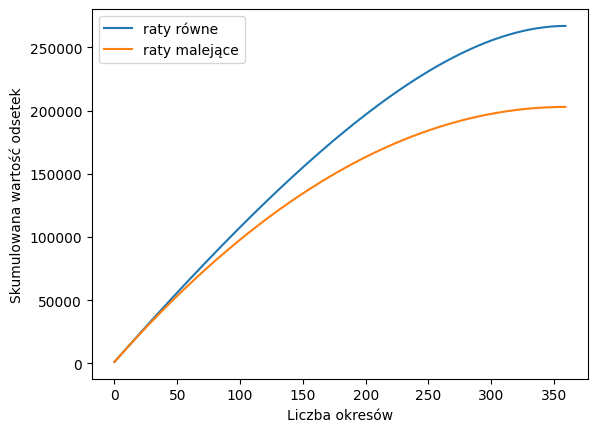

In [37]:
plt.plot(odsetki_rowne.cumsum(),label='raty równe')
plt.plot(odsetki_malejace.cumsum(),label='raty malejące')
plt.legend()
plt.xlabel('Liczba okresów')
plt.ylabel('Skumulowana wartość odsetek')